In [17]:
import pandas as pd
data_url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
df = pd.read_csv(data_url)#.fillna(0).set_index("date")

In [18]:
df = df.fillna(0).set_index("date")
df.index = pd.to_datetime(df.index) 
dg = df[["iso_code","new_cases", "total_cases"]]
dh = dg[dg["iso_code"].isin(("AUT","USA","ITA"))]
#dg[dg["iso_code"]=="USA"]

def rhu(n, decimals=0):
    import math
    multiplier = 10 ** decimals
    return math.floor(n*multiplier + 0.5) / multiplier

,iso_code,new_cases,total_cases
date,,,
2020-02-25,AUT,2.0,2.0
2020-02-26,AUT,0.0,2.0
2020-02-27,AUT,1.0,3.0
2020-02-28,AUT,0.0,3.0
2020-02-29,AUT,6.0,9.0
...,...,...,...
2021-09-13,USA,260152.0,41317328.0
2021-09-14,USA,144334.0,41461662.0
2021-09-15,USA,166284.0,41627946.0


Miscellanea below

N: 8900000 minAUT: 2.0 maxAUT: 15774.0 minst/maxst: 0.00012679092177000128 {0.00012679092177000128} maxst/N: 0.0017723595505617978
N: 60000000.0 minITA: 453.0 maxITA: 217185.0 minst/maxst: 0.0020857794046550177 {0.0020857794046550177} maxst/N: 0.00361975
N: 332000000 minUSA: 16.0 maxUSA: 1295396.0 minst/maxst: 1.2351435391185398e-05 {1.2351435391185398e-05} maxst/N: 0.0039017951807228915


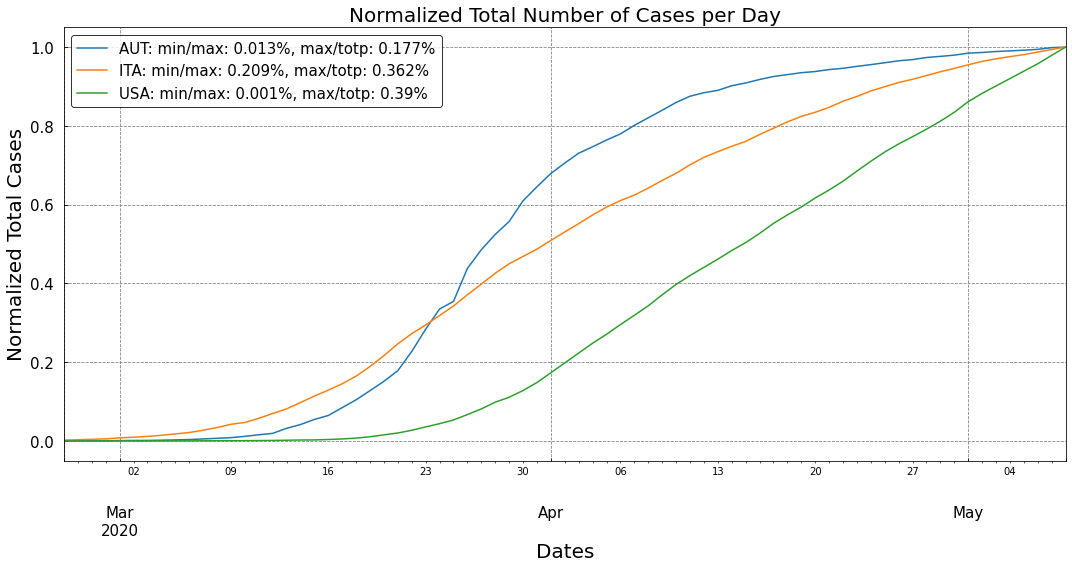

In [20]:
states = ["AUT","ITA","USA"]; N_states = [int(8.9*1e6), 6*1e7, int(3.32*1e8)]
def pdstates(state, ax, N):
    df = dh[dh["iso_code"]==state]
    start_date = "2020-02-25"; end_date = "2020-05-08"
    mask = (df.index > start_date) & (df.index <= end_date) 
    df = df.loc[mask]
    #dfstat["MA_dni_"+state] = dfstat["new_cases"].rolling(window = 7).mean()
    #dfstat["MA_dni_"+state].plot(ax = axs, label = state)
    maxst = df.iloc[:,-2:].max()["total_cases"]
    minst = df["total_cases"][0]
    #https://sdw.ecb.europa.eu/quickview.do?SERIES_KEY=139.AME.A.AUT.1.0.0.0.ZUTN&periodSortOrder=ASC
    df = df.iloc[:,-2:].apply(lambda x: x/ x.max(), axis=0)
    print(f'N: {N}',f'min{state}: {minst}', f'max{state}: {maxst}', f'minst/maxst: {minst/maxst}',{minst/maxst}, f'maxst/N: {maxst/N}',)
    df["total_cases"].plot(ax = axs, label = f"{state}: min/max: {rhu(minst/maxst*100,3)}%, max/totp: {rhu(maxst/N*100,3)}%")

import matplotlib.pylab as plt
fig, axs = plt.subplots(figsize=(15, 8))
for state, n in zip(states, N_states):
    pdstates(state, ax = axs, N = n)
plt.grid(color = "grey", ls = "--")
plt.xlabel("Dates", fontsize = 20); plt.ylabel("Normalized Total Cases", fontsize = 20); 
plt.title("Normalized Total Number of Cases per Day", fontsize = 20)
plt.tick_params(axis = "both", labelsize = 15, direction="in", pad=10)

#plt.xticks(fontsize=10)
plt.tight_layout()
plt.legend(prop = {"size":15}, edgecolor = "k")
path_string = "/home/hal21/MEGAsync/Tour_Physics2.0/Thesis/NetSciThesis/Project/ComplexSpread/LateX/images/Introduction"
plt.savefig(f"{path_string}/COVID-RealStates.png", format="png", dpi=200)
